# Capstone Project - The Battle of Neighborhoods (Week 2)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project I try to find a good sopt to open a **Persian Restaurant**.

Since there are so many **Persians** in the **Orange County, California**, this county would be a very good place. 

Orange county is a county consisted of many cities. Therefore: 
* First I need to find the best city.  
* Then I need to find a good location to solidify the _Revenue_.



## Data <a name="data"></a>

Based on the problem: 
* First I need to find out which cities already have Persian restaurants in them. 
* Then I can decide which part of the city is avaiable for our new business.

By the help of **Foursquare API** I can get information about the venues and restaurants in different cities of **Orange County**.

I also can obtain some information about the population of different cities with some web scraping on **Wikipedia** to come up with a better decision. 

OK, let's start working on this project with importing required libraries.

In [1]:
import requests
import pandas as pd 
import numpy as np 
from geopy.geocoders import Nominatim 
import re
from pandas import json_normalize
import folium
import matplotlib.pyplot as plt

I'm gonna need my Client ID and Client Secret to work with Foursquare API.

In [42]:
CLIENT_ID = '' # My Foursquare ID
CLIENT_SECRET = '' # My Foursquare Secret
VERSION = '20200102' # Version 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Now let's get the coordinates of **Orange County.**

In [3]:
address = 'Orange County, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

33.7500378 -117.8704931


I want to search for **Persian Venues** in a radius of 20 kilometers in OC(Orange County).

In [4]:
search_query = 'Persian'
radius = 20000

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius)
url

'https://api.foursquare.com/v2/venues/search?client_id=D1WCON0VMXCU035VMQDLPFH1O1VC0XIKIHHKKLEXUWZ5I0Y2&client_secret=DXYISZEMUO1RPKNDFIEWQ5QQVSMCPGKTQVTJZM0A2MN4QUK1&ll=33.7500378,-117.8704931&v=20200102&query=Persian&radius=20000'

The results will be in a form of a JSON file.

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3ec9e41883f35ebf81c2a0'},
 'response': {'venues': [{'id': '4cc4baa2b2beb1f7ddb51e4c',
    'name': 'Persian food wholesome choice',
    'location': {'lat': 33.67013179618636,
     'lng': -117.8277055252496,
     'labeledLatLngs': [{'label': 'display',
       'lat': 33.67013179618636,
       'lng': -117.8277055252496}],
     'distance': 9737,
     'postalCode': '92612',
     'cc': 'US',
     'city': 'Irvine',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['Irvine, CA 92612', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d115941735',
      'name': 'Middle Eastern Restaurant',
      'pluralName': 'Middle Eastern Restaurants',
      'shortName': 'Middle Eastern',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597950448',
    'hasPerk': False},
   {'id': '4b32dc78f964a5202f1525e3',
    'name': 'Da

Now let's transform the venues into a dataframe.

In [7]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,...,location.country,location.formattedAddress,location.address,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet
0,4cc4baa2b2beb1f7ddb51e4c,Persian food wholesome choice,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1597950448,False,33.670132,-117.827706,"[{'label': 'display', 'lat': 33.67013179618636...",9737,92612,...,United States,"[Irvine, CA 92612, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b32dc78f964a5202f1525e3,Darya Persian Cuisine,"[{'id': '52e81612bcbc57f1066b79f7', 'name': 'P...",v-1597950448,False,33.696149,-117.889960,"[{'label': 'display', 'lat': 33.69614915759538...",6263,92704,...,United States,"[3800 S Plaza Dr, Santa Ana, CA 92704, United ...",3800 S Plaza Dr,332829,https://www.grubhub.com/restaurant/darya-resta...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
2,54553a18498ed42af5f58be1,The Persian Playhouse,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",v-1597950448,False,33.646950,-117.829071,"[{'label': 'display', 'lat': 33.64694976806640...",12099,92617,...,United States,"[33410 Arroyo Dr, Irvine, CA 92617, United Sta...",33410 Arroyo Dr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5039a3d4e4b09ecf9ef26bce,Persian Treasure Rugs,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",v-1597950448,False,33.640821,-117.918238,"[{'label': 'display', 'lat': 33.640821, 'lng':...",12937,92627,...,United States,"[Costa Mesa, CA 92627, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4dd9b45afa76ad96d15ca51e,Persian Family Dinner,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1597950448,False,33.689171,-118.015775,"[{'label': 'display', 'lat': 33.68917149448949...",15061,NaN,...,United States,"[Huntington Beach, CA, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's filter the columns and keep the necessary ones.

In [8]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered.head()

,name,categories,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,id
0,Persian food wholesome choice,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",33.670132,-117.827706,"[{'label': 'display', 'lat': 33.67013179618636...",9737,92612,US,Irvine,CA,United States,"[Irvine, CA 92612, United States]",NaN,NaN,4cc4baa2b2beb1f7ddb51e4c
1,Darya Persian Cuisine,"[{'id': '52e81612bcbc57f1066b79f7', 'name': 'P...",33.696149,-117.889960,"[{'label': 'display', 'lat': 33.69614915759538...",6263,92704,US,Santa Ana,CA,United States,"[3800 S Plaza Dr, Santa Ana, CA 92704, United ...",3800 S Plaza Dr,NaN,4b32dc78f964a5202f1525e3
2,The Persian Playhouse,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",33.646950,-117.829071,"[{'label': 'display', 'lat': 33.64694976806640...",12099,92617,US,Irvine,CA,United States,"[33410 Arroyo Dr, Irvine, CA 92617, United Sta...",33410 Arroyo Dr,NaN,54553a18498ed42af5f58be1
3,Persian Treasure Rugs,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",33.640821,-117.918238,"[{'label': 'display', 'lat': 33.640821, 'lng':...",12937,92627,US,Costa Mesa,CA,United States,"[Costa Mesa, CA 92627, United States]",NaN,NaN,5039a3d4e4b09ecf9ef26bce
4,Persian Family Dinner,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",33.689171,-118.015775,"[{'label': 'display', 'lat': 33.68917149448949...",15061,NaN,US,Huntington Beach,CA,United States,"[Huntington Beach, CA, United States]",NaN,NaN,4dd9b45afa76ad96d15ca51e


Now I'm gonna clean up the 'categories' and make it more readable.

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.head()

,name,categories,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,id
0,Persian food wholesome choice,Middle Eastern Restaurant,33.670132,-117.827706,"[{'label': 'display', 'lat': 33.67013179618636...",9737,92612,US,Irvine,CA,United States,"[Irvine, CA 92612, United States]",NaN,NaN,4cc4baa2b2beb1f7ddb51e4c
1,Darya Persian Cuisine,Persian Restaurant,33.696149,-117.889960,"[{'label': 'display', 'lat': 33.69614915759538...",6263,92704,US,Santa Ana,CA,United States,"[3800 S Plaza Dr, Santa Ana, CA 92704, United ...",3800 S Plaza Dr,NaN,4b32dc78f964a5202f1525e3
2,The Persian Playhouse,Nightclub,33.646950,-117.829071,"[{'label': 'display', 'lat': 33.64694976806640...",12099,92617,US,Irvine,CA,United States,"[33410 Arroyo Dr, Irvine, CA 92617, United Sta...",33410 Arroyo Dr,NaN,54553a18498ed42af5f58be1
3,Persian Treasure Rugs,Furniture / Home Store,33.640821,-117.918238,"[{'label': 'display', 'lat': 33.640821, 'lng':...",12937,92627,US,Costa Mesa,CA,United States,"[Costa Mesa, CA 92627, United States]",NaN,NaN,5039a3d4e4b09ecf9ef26bce
4,Persian Family Dinner,Mediterranean Restaurant,33.689171,-118.015775,"[{'label': 'display', 'lat': 33.68917149448949...",15061,NaN,US,Huntington Beach,CA,United States,"[Huntington Beach, CA, United States]",NaN,NaN,4dd9b45afa76ad96d15ca51e


In [10]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Persian food wholesome choice,Middle Eastern Restaurant,33.670132,-117.827706,"[{'label': 'display', 'lat': 33.67013179618636...",9737,92612,US,Irvine,CA,United States,"[Irvine, CA 92612, United States]",NaN,NaN,4cc4baa2b2beb1f7ddb51e4c
1,Darya Persian Cuisine,Persian Restaurant,33.696149,-117.889960,"[{'label': 'display', 'lat': 33.69614915759538...",6263,92704,US,Santa Ana,CA,United States,"[3800 S Plaza Dr, Santa Ana, CA 92704, United ...",3800 S Plaza Dr,NaN,4b32dc78f964a5202f1525e3
2,The Persian Playhouse,Nightclub,33.646950,-117.829071,"[{'label': 'display', 'lat': 33.64694976806640...",12099,92617,US,Irvine,CA,United States,"[33410 Arroyo Dr, Irvine, CA 92617, United Sta...",33410 Arroyo Dr,NaN,54553a18498ed42af5f58be1
3,Persian Treasure Rugs,Furniture / Home Store,33.640821,-117.918238,"[{'label': 'display', 'lat': 33.640821, 'lng':...",12937,92627,US,Costa Mesa,CA,United States,"[Costa Mesa, CA 92627, United States]",NaN,NaN,5039a3d4e4b09ecf9ef26bce
4,Persian Family Dinner,Mediterranean Restaurant,33.689171,-118.015775,"[{'label': 'display', 'lat': 33.68917149448949...",15061,NaN,US,Huntington Beach,CA,United States,"[Huntington Beach, CA, United States]",NaN,NaN,4dd9b45afa76ad96d15ca51e
5,Darbari Persian Grill,Persian Restaurant,33.642367,-117.917264,"[{'label': 'display', 'lat': 33.64236674783392...",12744,92627,US,Costa Mesa,CA,United States,"[1866 Newport Blvd (Flower St), Costa Mesa, CA...",1866 Newport Blvd,Flower St,54baccba498e2a412ca9154e
6,Persian Pint,Speakeasy,33.868887,-117.739457,"[{'label': 'display', 'lat': 33.868887, 'lng':...",17942,92808,US,Anaheim,CA,United States,"[Anaheim, CA 92808, United States]",NaN,NaN,510a89f3e4b0d05412f14964
7,Irvine Persian Church,Church,33.674344,-117.773549,"[{'label': 'display', 'lat': 33.674344, 'lng':...",12311,92618,US,Irvine,CA,United States,"[Irvine, CA 92618, United States]",NaN,NaN,4fd543d5e4b0b31b85533a46
8,Hatam Persian Grill,Afghan Restaurant,33.845035,-117.958139,"[{'label': 'display', 'lat': 33.84503463038067...",13325,NaN,US,Mission Viejo,CA,United States,"[Mission Viejo, CA, United States]",NaN,NaN,51d79762498e751cd310b26f
9,Caspian,Persian Restaurant,33.708321,-117.782633,"[{'label': 'display', 'lat': 33.7083212809436,...",9366,92604,US,Irvine,CA,United States,"[14100 Culver Dr, Irvine, CA 92604, United Sta...",14100 Culver Dr,NaN,4b5bb78cf964a520d91129e3


We can see that we have 13 different **Persian venues** in **OC**, and we are interested in the restaurants. 

Lte's just keep the restaurants.

In [11]:
dataframe_filtered = dataframe_filtered[dataframe_filtered['categories'].str.contains('[a-z]*Restaurant*[a-z]', flags=re.I, regex=True)]
dataframe_filtered.reset_index(drop=True)

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Persian food wholesome choice,Middle Eastern Restaurant,33.670132,-117.827706,"[{'label': 'display', 'lat': 33.67013179618636...",9737,92612,US,Irvine,CA,United States,"[Irvine, CA 92612, United States]",NaN,NaN,4cc4baa2b2beb1f7ddb51e4c
1,Darya Persian Cuisine,Persian Restaurant,33.696149,-117.889960,"[{'label': 'display', 'lat': 33.69614915759538...",6263,92704,US,Santa Ana,CA,United States,"[3800 S Plaza Dr, Santa Ana, CA 92704, United ...",3800 S Plaza Dr,NaN,4b32dc78f964a5202f1525e3
2,Persian Family Dinner,Mediterranean Restaurant,33.689171,-118.015775,"[{'label': 'display', 'lat': 33.68917149448949...",15061,NaN,US,Huntington Beach,CA,United States,"[Huntington Beach, CA, United States]",NaN,NaN,4dd9b45afa76ad96d15ca51e
3,Darbari Persian Grill,Persian Restaurant,33.642367,-117.917264,"[{'label': 'display', 'lat': 33.64236674783392...",12744,92627,US,Costa Mesa,CA,United States,"[1866 Newport Blvd (Flower St), Costa Mesa, CA...",1866 Newport Blvd,Flower St,54baccba498e2a412ca9154e
4,Hatam Persian Grill,Afghan Restaurant,33.845035,-117.958139,"[{'label': 'display', 'lat': 33.84503463038067...",13325,NaN,US,Mission Viejo,CA,United States,"[Mission Viejo, CA, United States]",NaN,NaN,51d79762498e751cd310b26f
5,Caspian,Persian Restaurant,33.708321,-117.782633,"[{'label': 'display', 'lat': 33.7083212809436,...",9366,92604,US,Irvine,CA,United States,"[14100 Culver Dr, Irvine, CA 92604, United Sta...",14100 Culver Dr,NaN,4b5bb78cf964a520d91129e3
6,Rendez-vous Fine Persian And European Cuisine,Middle Eastern Restaurant,33.662369,-117.667847,"[{'label': 'display', 'lat': 33.66236877441406...",21152,92630,US,Lake Forest,CA,United States,"[20651 Lake Forest Dr, Lake Forest, CA 92630, ...","20651 Lake Forest Dr, Lake Forest, CA 92630",NaN,4ef0e68129c22c6c773e19ec


We ended up with seven restaurants.

Now we can see where they are.

In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) 

# add a red circle marker to represent the center of OC
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='OC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

OK, now lets take a look at the population of the different cities in **OC**.

Because more populated cities means more potential customers. 

For this part I could gather data by web scarping through **Pandas.**

In [14]:
url2 = 'https://en.wikipedia.org/wiki/California_locations_by_race#cite_note-other-3'
df_list = pd.read_html(url2)

In [15]:
d = df_list[2]
d.head()

,Place,County/ies[3][note 3],Population[1],White[1],Other[1][note 1],Asian[1],Black or AfricanAmerican[1],Native American[1][note 2],Hispanic or Latino(of any race)[2]
0,Acalanes Ridge,Contra Costa,1431,71.6%,14.0%,11.8%,0.0%,2.6%,4.8%
1,Acampo,San Joaquin,387,100.0%,0.0%,0.0%,0.0%,0.0%,92.2%
2,Acton,Los Angeles,7138,87.5%,10.9%,1.2%,0.2%,0.3%,15.8%
3,Adelanto,San Bernardino,30670,55.5%,19.4%,2.4%,21.1%,1.5%,51.8%
4,Adin,Modoc,418,96.7%,0.0%,0.0%,0.0%,3.3%,2.2%


This table is for California locations by race and have extra information that I don't need. 

I do some cleaning.

In [16]:
df = d[['Place', 'County/ies[3][note 3]', 'Population[1]']]
df.head()

,Place,County/ies[3][note 3],Population[1]
0,Acalanes Ridge,Contra Costa,1431
1,Acampo,San Joaquin,387
2,Acton,Los Angeles,7138
3,Adelanto,San Bernardino,30670
4,Adin,Modoc,418


In [17]:
df = df.rename(columns = {'County/ies[3][note 3]': 'County', 'Population[1]': 'Population'})
df.head()

,Place,County,Population
0,Acalanes Ridge,Contra Costa,1431
1,Acampo,San Joaquin,387
2,Acton,Los Angeles,7138
3,Adelanto,San Bernardino,30670
4,Adin,Modoc,418


In [18]:
df.shape

(1523, 3)

Wow, there are 1523 cities. But luckily I just need the cities in the county of orange.

In [19]:
df = df.loc[df.County == 'Orange']
df.head()

,Place,County,Population
17,Aliso Viejo,Orange,47037
35,Anaheim,Orange,335057
152,Brea,Orange,38837
164,Buena Park,Orange,80214
305,Costa Mesa,Orange,109796


Let's reset the index.

In [20]:
df.reset_index(drop=True, inplace=True)
df.head()

,Place,County,Population
0,Aliso Viejo,Orange,47037
1,Anaheim,Orange,335057
2,Brea,Orange,38837
3,Buena Park,Orange,80214
4,Costa Mesa,Orange,109796


In [21]:
df.shape

(41, 3)

We have 41 cities in **Orange County.** I didn't know that.

## Methodology <a name="methodology"></a>

As I mentioned earlier, cities with more population are better options for opening a restaurant simply because we have more potential customers. 

Now let's back to our first dataframe and see the cities with **Persian Restaurants.**

In [22]:
dataframe_filtered.groupby('city').count()

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,state,country,formattedAddress,address,crossStreet,id
city,,,,,,,,,,,,,,
Costa Mesa,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Huntington Beach,1,1,1,1,1,1,0,1,1,1,1,0,0,1
Irvine,2,2,2,2,2,2,2,2,2,2,2,1,0,2
Lake Forest,1,1,1,1,1,1,1,1,1,1,1,1,0,1
Mission Viejo,1,1,1,1,1,1,0,1,1,1,1,0,0,1
Santa Ana,1,1,1,1,1,1,1,1,1,1,1,1,0,1


There are two Persian reataurants in Irvine.

Now I sort the cities based on the **Population.**

In [24]:
df = df.sort_values('Population', ascending=False)

In [25]:
df_top = df.head(13)
df_top

,Place,County,Population
1,Anaheim,Orange,335057
33,Santa Ana,Orange,325517
12,Irvine,Orange,205057
11,Huntington Beach,Orange,189744
10,Garden Grove,Orange,170148
27,Orange,Orange,135582
9,Fullerton,Orange,134079
4,Costa Mesa,Orange,109796
24,Mission Viejo,Orange,93076
39,Westminster,Orange,89440


In the above table, we can see the most populated cities. But we already know that we have Persian restaurants in some of them. For example, there is a restaurant in Santa Ana, and there are two in Irvine. 

Let's take out the cities that already have Persian restaurants. 

In [26]:
set_city = set(df_top.Place).difference(set(dataframe_filtered.city))
set_city

{'Anaheim',
 'Buena Park',
 'Fullerton',
 'Garden Grove',
 'Newport Beach',
 'Orange',
 'Westminster'}

Now I do some cleaning to make a graph of the remaining cities with their population.

In [27]:
df.set_index('Place', inplace=True)
df.head()

,County,Population
Place,,
Anaheim,Orange,335057
Santa Ana,Orange,325517
Irvine,Orange,205057
Huntington Beach,Orange,189744
Garden Grove,Orange,170148


In [28]:
df_plot = df.loc[['Anaheim',
 'Buena Park',
 'Fullerton',
 'Garden Grove',
 'Newport Beach',
 'Orange',
 'Westminster']]
df_plot

,County,Population
Place,,
Anaheim,Orange,335057
Buena Park,Orange,80214
Fullerton,Orange,134079
Garden Grove,Orange,170148
Newport Beach,Orange,84417
Orange,Orange,135582
Westminster,Orange,89440


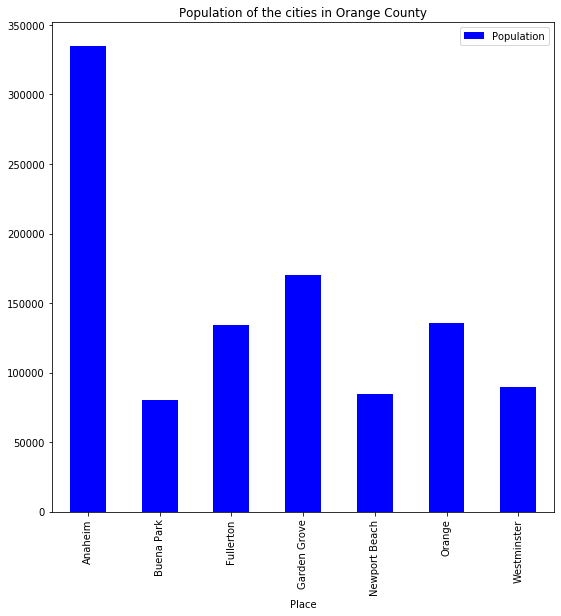

In [29]:
df_plot.drop(["County"], axis=1, inplace=True)
df_plot.plot(kind='bar', figsize=(9, 9), color='blue')
plt.title('Population of the cities in Orange County')

plt.show()

We can see that **Anaheim** is by far the best city for the investemnet. (Based on the population)

Ok, now let's take a look at the different venuues in Anaheim. 

In [30]:
# Coordinates of Anaheim
address = 'Anaheim, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

33.8347516 -117.911732


I limit the search too 100, and in a radius of 2 kilometres of the center of Anaheim. 

In [31]:
LIMIT = 100 

radius = 2000 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
   
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=D1WCON0VMXCU035VMQDLPFH1O1VC0XIKIHHKKLEXUWZ5I0Y2&client_secret=DXYISZEMUO1RPKNDFIEWQ5QQVSMCPGKTQVTJZM0A2MN4QUK1&v=20200102&ll=33.8347516,-117.911732&radius=2000&limit=100'

In [32]:
results_an = requests.get(url).json()
results_an

{'meta': {'code': 200, 'requestId': '5f3ed4b626418f2e9e07b649'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Colony',
  'headerFullLocation': 'The Colony, Anaheim',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 33.85275161800001,
    'lng': -117.8901025810917},
   'sw': {'lat': 33.81675158199998, 'lng': -117.9333614189083}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ce99a7b595cb1f7fe92cf14',
       'name': 'Anaheim Packing House',
       'location': {'address': '440 S Anaheim Blvd',
        'lat': 33.83154574651803,
        'lng': -117.91194618320792,
        'labeledLa

Some cleaning again.

In [33]:
venues = results_an['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Anaheim Packing House,Food Court,33.831546,-117.911946
1,Umami Burger,Burger Joint,33.832693,-117.912717
2,Okayama Kobo,Bakery,33.834115,-117.914769
3,Unsung Brewing Company,Brewery,33.830957,-117.912098
4,Orange Roll & Sushi,Sushi Restaurant,33.832435,-117.913140


In [34]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print('There are {} uniques categories.'.format(len(nearby_venues['categories'].unique())))

85 venues were returned by Foursquare.
There are 55 uniques categories.


In [35]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker the center of Anaheim
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='OC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


venues_map

These are the venues in Anaheim.

It's time to extract the restaurants. 

In [36]:
nearby_venues = nearby_venues[nearby_venues['categories'].str.contains('[a-z]*Restaurant*[a-z]', flags=re.I, regex=True)]
nearby_venues.head()

,name,categories,lat,lng
4,Orange Roll & Sushi,Sushi Restaurant,33.832435,-117.913140
7,Punjabi Tandoor,Indian Restaurant,33.832341,-117.913039
10,Healthy Junk,Vegetarian / Vegan Restaurant,33.833971,-117.915513
11,Kettle Bar,Cajun / Creole Restaurant,33.831588,-117.911852
16,Urbana,Mexican Restaurant,33.831558,-117.911974


In [37]:
nearby_venues.shape

(27, 4)

There are 27 restaurants in Anaheim. If we wanted to have more customers, it would be better to open the restaurnt far way from other restaurants. By the way Americans and other nationalities like **Persian Food.**

With the help of K-Means Clustering, we can put the different restaurants into three distinct clusters. 

In [38]:
from sklearn.cluster import KMeans
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_venues[['lat','lng']])

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

Let's add labels to our dataframe.

In [40]:
nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)
nearby_venues.head()

,Cluster Labels,name,categories,lat,lng
4,0,Orange Roll & Sushi,Sushi Restaurant,33.832435,-117.913140
7,0,Punjabi Tandoor,Indian Restaurant,33.832341,-117.913039
10,0,Healthy Junk,Vegetarian / Vegan Restaurant,33.833971,-117.915513
11,0,Kettle Bar,Cajun / Creole Restaurant,33.831588,-117.911852
16,0,Urbana,Mexican Restaurant,33.831558,-117.911974


In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, cluster, index in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['Cluster Labels'], nearby_venues['name']):
    label = folium.Popup(index + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters       

## Results and Discussion <a name="results"></a>

We can see the three different clusters on this map, which are from North to West, and South.
So, there is plenty of space for us on the East side of the city through the South. 
We can see that we have a couple of blocks available to ourselves. 

But in the end, some stakeholders will come up with the final decision on where to start this business. They may prefer any shopping center or plaza over the others in these locations.  

## Conclusion <a name="conclusion"></a>

In this study, I tried to find the best possible locations in Orange County, California, to open a new Persian Restaurant. We can see that with the help of Foursquare API and some extra information, it was not that hard. We need the right data for this project, which is obtained through Wikipedia and Foursquare API. Nevertheless, we need some background information about Python, Data cleaning, Data Analysis, some plotting, Machine learning, and some skills related to Data Science. 
